In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('invistico_Airline.csv')  #reading the dataset
df.head

print(df.head())

  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3

In [12]:
df.shape


(129880, 23)

In [13]:
print("Datset info: ")
df.info()

Datset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service    

# Data visualisation

In [61]:
df.isnull().sum()  # check null values in dataframe



satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [15]:
df.duplicated().sum()


0

In [62]:
import seaborn as sns

# Define the numerical attributes in list
numeric_attributes = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Create a visual representation 
plt.figure(figsize=(10, 7))

# Calculate the correlation matrix for the selected numeric attributes
correlation_matrix = df[numeric_attributes].corr()

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set a title for the heatmap
plt.title('Correlation Heatmap for Numeric Attributes')

# Display the heatmap
plt.show()


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Flight Distance'>

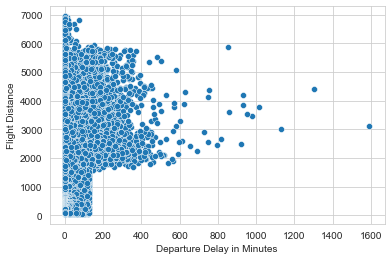

In [54]:
sns.scatterplot(y=df['Flight Distance'], x=df['Departure Delay in Minutes'])


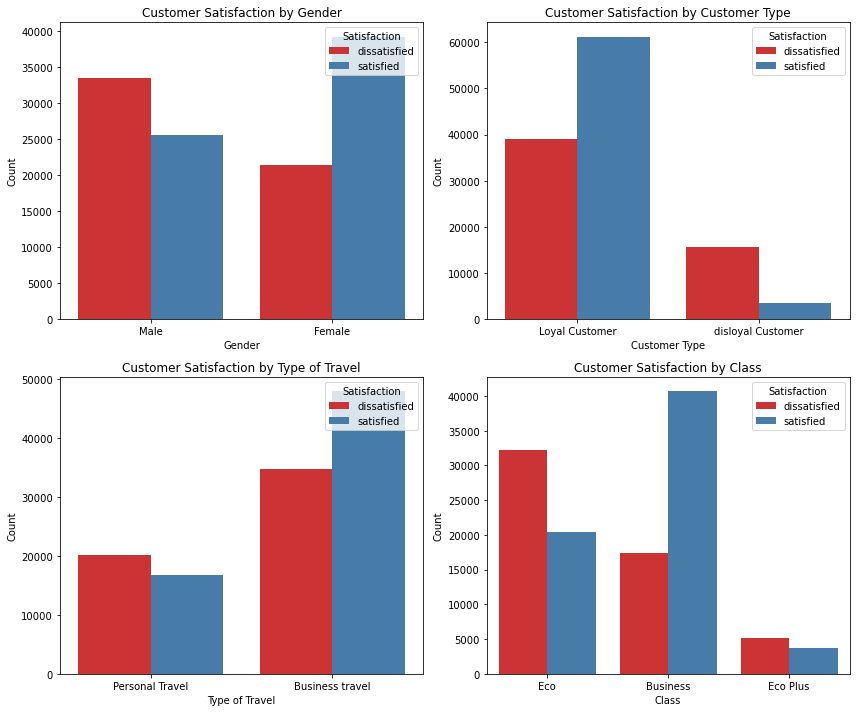

In [27]:
categoricalColumns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create a figure
plt.figure(figsize=(12, 10))

#loop through each column and enumerate for subplot
for i, column in enumerate(categoricalColumns, 1):
    plt.subplot(2, 2, i)  # create subplot with 2x2 grod
    sns.countplot(data=df, x=column, hue='satisfaction', palette='Set1')
    plt.title('Customer Satisfaction by {}'.format(column))
    plt.xlabel(column)    #set x-axis to current column in list
    plt.ylabel('Count')    # set y-axis to count
    plt.legend(title='Satisfaction', loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


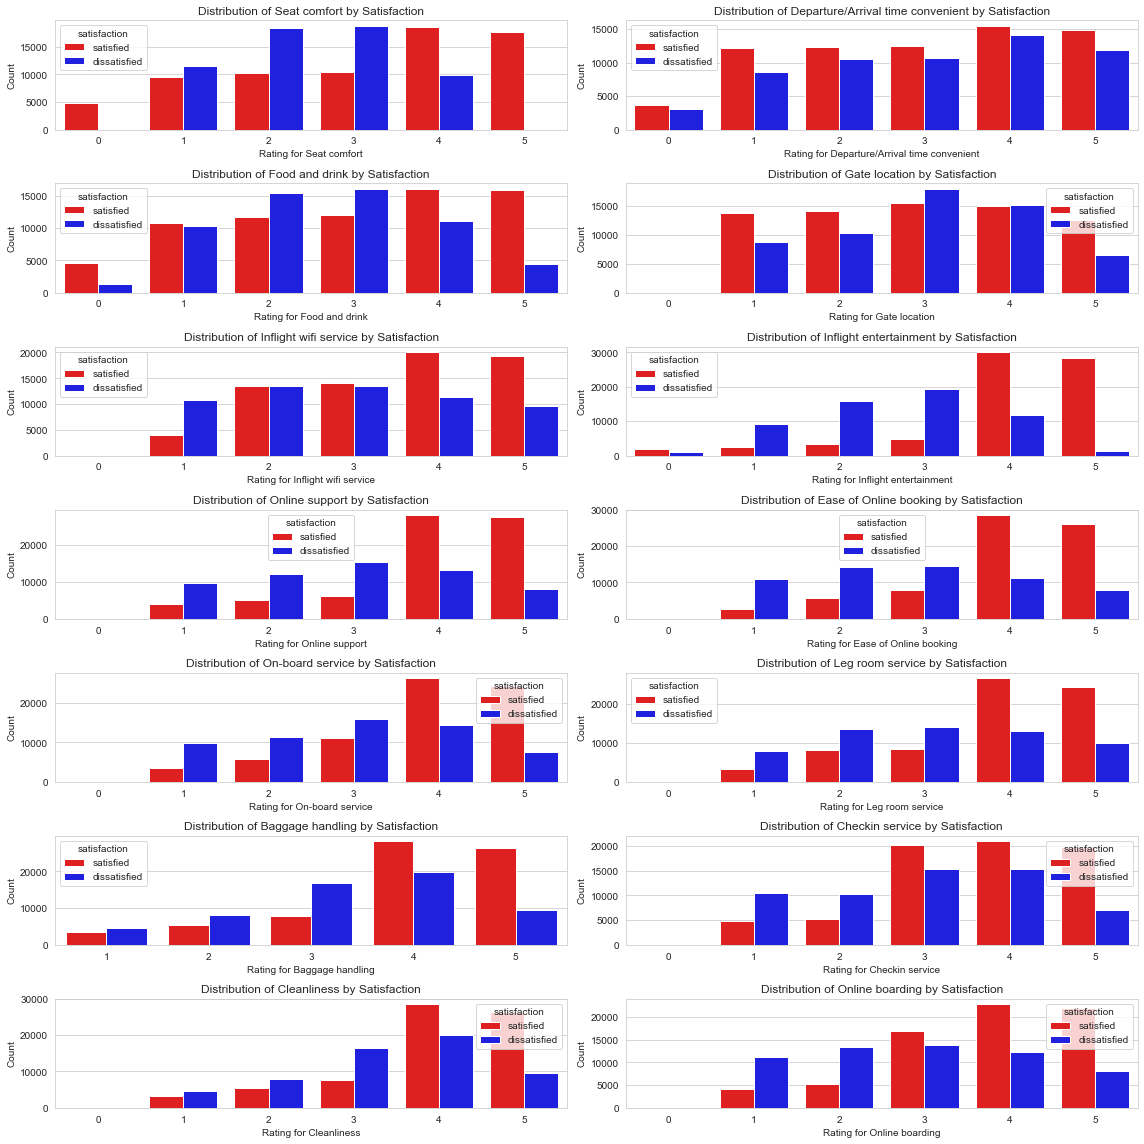

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of rating features to be considered for analysis
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']

# Set the figure size and style
plt.figure(figsize=(16, 16))
sns.set_style("whitegrid")

# Iterate through the rating features and create side-by-side bar plots
for i, feature in enumerate(rating_features):
    plt.subplot(7, 2, i + 1)
    
    sns.countplot(data=df, x=feature, hue='satisfaction', palette=['red', 'blue'])
    
    # Set titles, x-axis labels, and y-axis labels for each subplot
    plt.title(f'Distribution of {feature} by Satisfaction', fontsize=12)
    plt.xlabel(f'Rating for {feature}', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=0)

# Adjust subplot layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


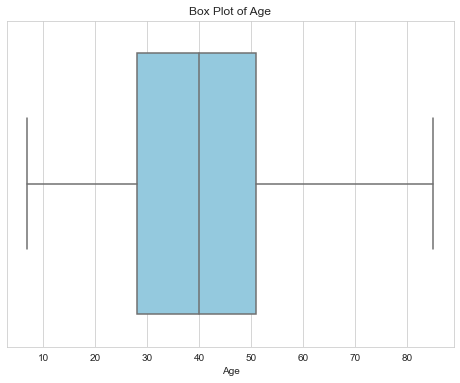

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Age' variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Age', orient='v', color='skyblue')

# Set the title of the plot
plt.title('Box Plot of Age')

# Display the plot
plt.show()


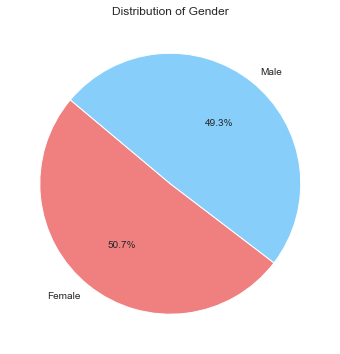

In [64]:
import matplotlib.pyplot as plt

# Count the number of females
female_count = df[df['Gender'] == 'Female']['Gender'].count()

# Count the number of males
male_count = df[df['Gender'] == 'Male']['Gender'].count()

# Create a list of counts
gender_counts = [female_count, male_count]

# Define the labels for the pie chart
labels = ['Female', 'Male']

# Define colors for the sections of the pie chart
colors = ['lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title of the pie chart
plt.title('Distribution of Gender')

# Display the pie chart
plt.show()


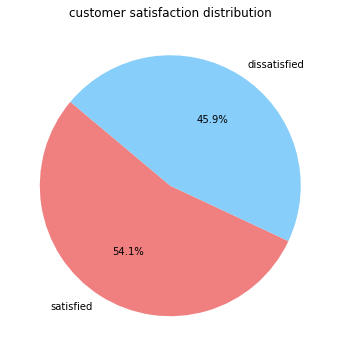

In [23]:
import matplotlib.pyplot as plt

satisfiedCustomers = df[df['satisfaction'] == 'satisfied']['satisfaction'].count() # count of satisfied customes

dissatisfiedCustomers = df[df['satisfaction'] == 'dissatisfied']['satisfaction'].count()  # count of unsatisfied customers

# Create a list of counts
satisfaction_count = [satisfiedCustomers, dissatisfiedCustomers]

# Define the labels for the pie chart
labels = ['satisfied', 'dissatisfied']

# Define colors for the sections of the pie chart
colors = ['lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set pie chart title
plt.title('customer satisfaction distribution')

# Display the pie chart
plt.show()


# Data pre-processing

In [25]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True) # drop the column


In [16]:
average_delay = df['Arrival Delay in Minutes'].mean()   # get mean of the column
print(average_delay)

15.09112883918849


In [17]:
df['Arrival Delay in Minutes'].fillna(average_delay,inplace=True)    #fill null values with mean 

In [18]:
df.isnull().sum()



satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [19]:
df['Seat comfort'].value_counts()


3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64

In [65]:
# list of categorical columns
cat_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for feature in cat_features:
    print(df[feature].value_counts())   # print value counts for all columns in list
    print('-' * 100)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
----------------------------------------------------------------------------------------------------
Female    65899
Male      63981
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
----------------------------------------------------------------------------------------------------
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
----------------------------------------------------------------------------------------------------
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
-----

In [21]:
cat_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for feature in cat_features:
    df = df.drop(df[df[feature] == 0].index)  # drop the rows containing 0 rating
    print(df[feature].value_counts())
    print('-' * 100)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
----------------------------------------------------------------------------------------------------
Female    65899
Male      63981
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
----------------------------------------------------------------------------------------------------
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
----------------------------------------------------------------------------------------------------
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
3    29183
2    28726
4    28398
1    20949
5    17827
Name: Seat comfort, dtype: int64
----------------

In [22]:
df.shape

(119611, 23)

In [31]:
df.head() # display top 5 rows


satisfaction Gender   Customer Type  Age   Type of Travel Class  \
1037  dissatisfied   Male  Loyal Customer   48  Personal Travel   Eco   
1038  dissatisfied   Male  Loyal Customer   48  Personal Travel   Eco   
1041  dissatisfied   Male  Loyal Customer   40  Personal Travel   Eco   
1043  dissatisfied   Male  Loyal Customer   46  Personal Travel   Eco   
1044  dissatisfied   Male  Loyal Customer   63  Personal Travel   Eco   

      Flight Distance  Seat comfort  Departure/Arrival time convenient  \
1037             4001             1                                  1   
1038             3980             1                                  1   
1041             2251             1                                  1   
1043             2453             1                                  1   
1044             2011             1                                  1   

      Food and drink  ...  Inflight entertainment  Online support  \
1037               1  ...                       1               1   
1038               1  ...                       1               4   
1041               1  ...                       1               1   
1043               1  ...                       1               5   
1044               1  ...                       1               5   

      Ease of Online booking  On-board service  Leg room service  \
1037                       1                 4                 1   
1038                       4                 2                 3   
1041                       1                 3                 3   
1043                       3                 1                 4   
1044                       5                 1                 5   

      Baggage handling  Checkin service  Cleanliness  Online boarding  \
1037                 1                4            2                1   
1038                 2                3            2                4   
1041                 2                1            1                1   
1043                 1                2            2                3   
1044                 2                1            2                5   

      Departure Delay in Minutes  
1037                          16  
1038                           0  
1041                           0  
1043                           3  
1044                          25  

[5 rows x 22 columns]

In [32]:
# List of categorical columns to be dummy encoded
categoricalColumns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Applying Dummy Encoding
df = pd.get_dummies(df, columns=categoricalColumns, drop_first=False)

# Display the new DataFrame with dummy variables
print(df.head())


      satisfaction  Age  Flight Distance  Seat comfort  \
1037  dissatisfied   48             4001             1   
1038  dissatisfied   48             3980             1   
1041  dissatisfied   40             2251             1   
1043  dissatisfied   46             2453             1   
1044  dissatisfied   63             2011             1   

      Departure/Arrival time convenient  Food and drink  Gate location  \
1037                                  1               1              1   
1038                                  1               1              1   
1041                                  1               1              1   
1043                                  1               1              1   
1044                                  1               1              1   

      Inflight wifi service  Inflight entertainment  Online support  ...  \
1037                      1                       1               1  ...   
1038                      4                       1   

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(df)

# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fitting the encoder to the 'satisfaction' column and transforming it
df['satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

# Display the DataFrame with the encoded 'satisfaction' column
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119611 entries, 1037 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       119611 non-null  int32
 1   Age                                119611 non-null  int64
 2   Flight Distance                    119611 non-null  int64
 3   Seat comfort                       119611 non-null  int64
 4   Departure/Arrival time convenient  119611 non-null  int64
 5   Food and drink                     119611 non-null  int64
 6   Gate location                      119611 non-null  int64
 7   Inflight wifi service              119611 non-null  int64
 8   Inflight entertainment             119611 non-null  int64
 9   Online support                     119611 non-null  int64
 10  Ease of Online booking             119611 non-null  int64
 11  On-board service                   119611 non-null  int64
 12 

<AxesSubplot:>

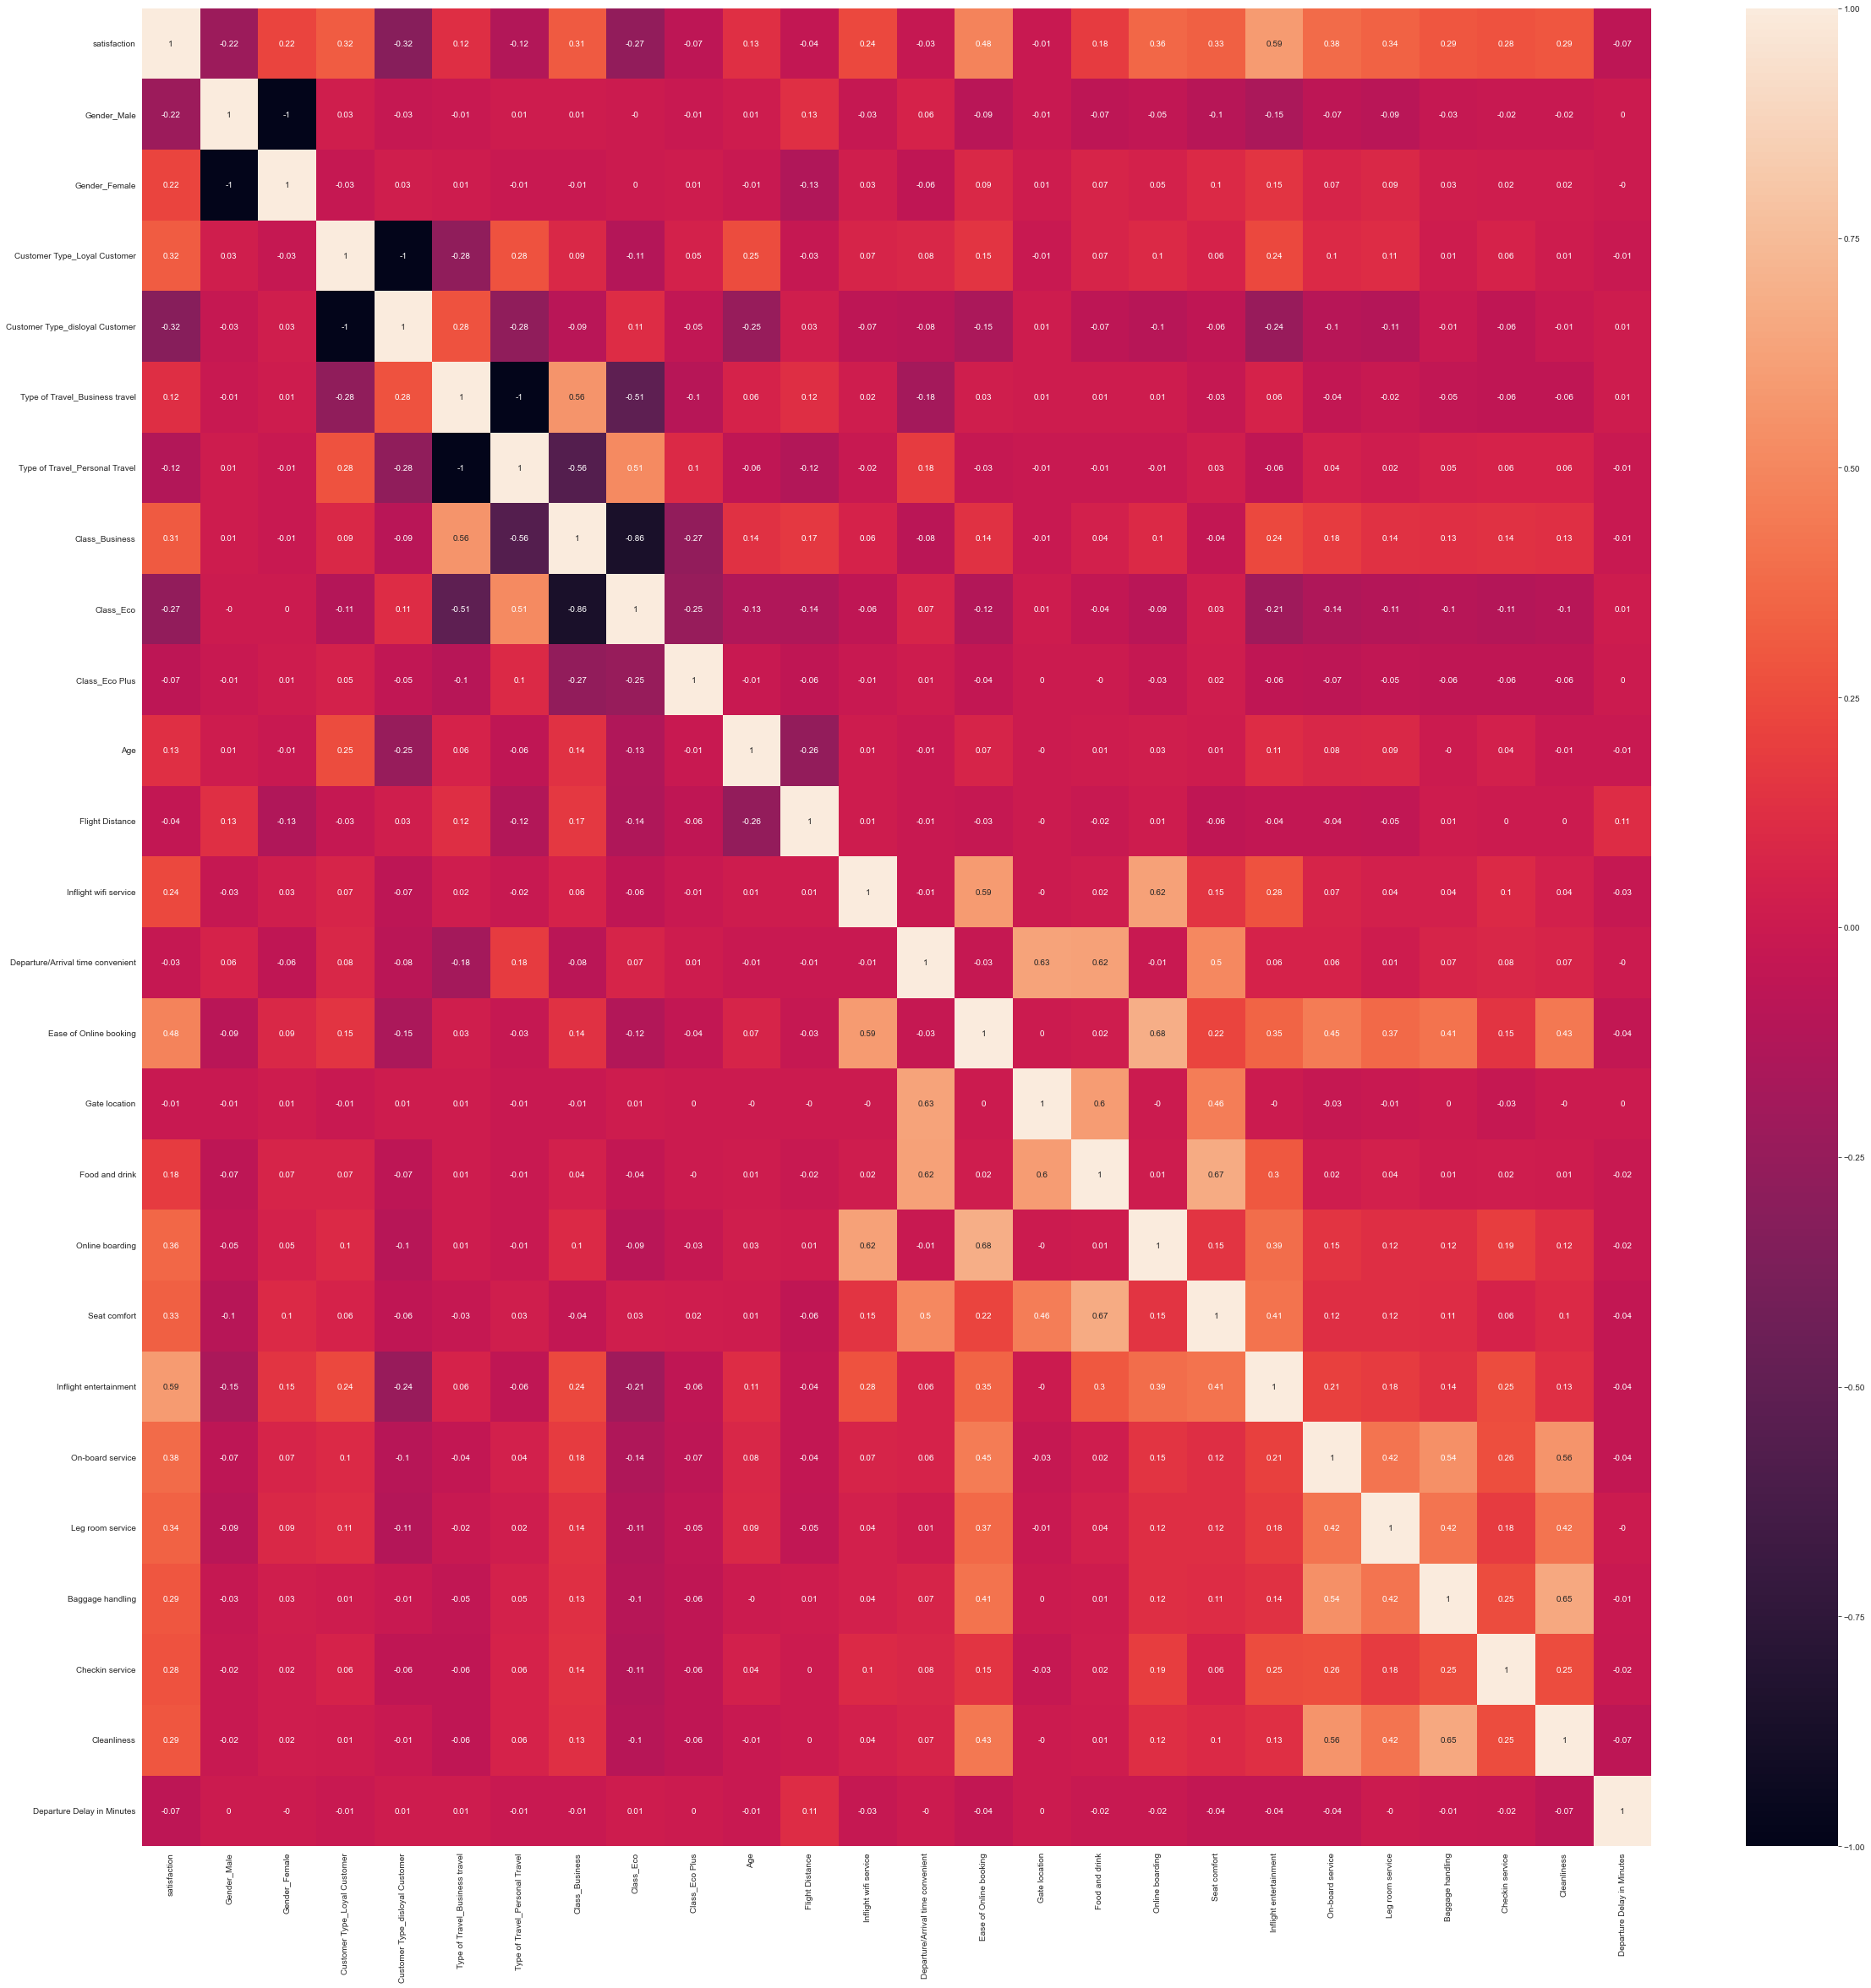

In [34]:
heatmap_df = df[['satisfaction', 'Gender_Male', 'Gender_Female','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel','Type of Travel_Personal Travel' , 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Age', 'Flight Distance',
 'Inflight wifi service', 'Departure/Arrival time convenient',
 'Ease of Online booking', 'Gate location', 'Food and drink',
 'Online boarding', 'Seat comfort', 'Inflight entertainment',
 'On-board service', 'Leg room service', 'Baggage handling',
 'Checkin service', 'Cleanliness',
 'Departure Delay in Minutes']]     # define all features
plt.figure(figsize=(40,40))
sns.heatmap(heatmap_df.corr().round(2),annot = True)    # make heat map

In [35]:
df.drop('Gate location', axis=1, inplace=True)    #Drop Gate location feature


In [36]:
x = df.iloc[:, 1:].values  # select all rows and all features except first one
y = df.iloc[:, 0].values  # select all rows and target variable to be first column
display(x)
display(y)

array([[  48, 4001,    1, ...,    0,    1,    0],
       [  48, 3980,    1, ...,    0,    1,    0],
       [  40, 2251,    1, ...,    0,    1,    0],
       ...,
       [  63, 2087,    2, ...,    1,    0,    0],
       [  66, 2450,    3, ...,    0,    1,    0],
       [  38, 4307,    3, ...,    0,    1,    0]], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=0) # split the data and use 25% for testing

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# define models in a list
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
for model in models:  # loop through all models

    model.fit(x_train, y_train)    # fit the moedl

    score = model.score(x_train,y_train)

    print(str(model) + " Training score        :{:.3f}".format(score))  # print training score to 3dp

    score = model.score(x_test, y_test)
    print(str(model) + ' Test score is         :{:.3f}'.format(score))   # print testing score to 3dp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Training score        :0.835
LogisticRegression() Test score is         :0.837
DecisionTreeClassifier() Training score        :1.000
DecisionTreeClassifier() Test score is         :0.935
RandomForestClassifier() Training score        :1.000
RandomForestClassifier() Test score is         :0.956


# Scaling

### Standard scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
newScale = StandardScaler()       # define standard scaler
x_train_scaled = newScale.fit_transform(x_train)
x_test_scaled = newScale.fit_transform(x_test)
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
for model in models:

    model.fit(x_train_scaled, y_train)   # fit the model with scaled features

    score = model.score(x_train_scaled,y_train)

    print(str(model) + " Training score        :{:.3f}".format(score))  # print training score to 3dp

    score = model.score(x_test_scaled, y_test)
    print(str(model) + ' Test score is         :{:.3f}'.format(score))   # print testing score to 3dp

LogisticRegression() Training score        :0.865
LogisticRegression() Test score is         :0.866
DecisionTreeClassifier() Training score        :1.000
DecisionTreeClassifier() Test score is         :0.935
RandomForestClassifier() Training score        :1.000
RandomForestClassifier() Test score is         :0.957


# Grid search for Logistic regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to evaluate
param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [300, 1000, 3000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the GridSearch to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
print('Test score of the best model:', score)

Test score of the best model: 0.8661003912650904


In [41]:
# Print the best parameters
print('Best parameters:', grid_search.best_params_)

# Print the model
print('Best model:', best_model)

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
print('Test score of the best model:', score)

Best parameters: {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
Best model: LogisticRegression(max_iter=300, solver='newton-cg')
Test score of the best model: 0.8661003912650904


# GridSearch for Decision Tree classifier 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters to evaluate
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
# Print the best parameters
print('Best parameters:', grid_search.best_params_)

# Print the model
print('Best model:', best_model)

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
print('Test score of the best model:', score)

Best parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1}
Best model: DecisionTreeClassifier(max_depth=15, max_features='auto')
Test score of the best model: 0.9319466274286861


# Grid Search for Random Forest Classifier

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to evaluate
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
# Print the best parameters
print('Best parameters:', grid_search.best_params_)

# Print the model
print('Best model:', best_model)

# Evaluate the best model on the test data
score = best_model.score(x_test_scaled, y_test)
print('Test score of the best model:', score)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Best model: RandomForestClassifier(max_depth=20, n_estimators=200)
Test score of the best model: 0.9564592181386483


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# define all models in list with their hyperparameters
models = [
    LogisticRegression(C=0.1, max_iter=300, solver='liblinear'),
    DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2),
    RandomForestClassifier(max_depth=20, n_estimators=300)
]
for model in models:

    model.fit(x_train_scaled, y_train)

    score = model.score(x_train_scaled,y_train)

    print(str(model) + " Training score        :{:.3f}".format(score))

    score = model.score(x_test_scaled, y_test)
    print(str(model) + ' Test score is         :{:.3f}'.format(score))


LogisticRegression(C=0.1, max_iter=300, solver='liblinear') Training score        :0.865
LogisticRegression(C=0.1, max_iter=300, solver='liblinear') Test score is         :0.866
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2) Training score        :0.968
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2) Test score is         :0.929
RandomForestClassifier(max_depth=20, n_estimators=300) Training score        :0.996
RandomForestClassifier(max_depth=20, n_estimators=300) Test score is         :0.956


# Crossvalidation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Load the three models
model1 = LogisticRegression(C=0.1, max_iter=300, solver='liblinear')
model2 = DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2)
model3 = RandomForestClassifier(max_depth=20, n_estimators=300)

# Define the cross-validation k-fold parameters
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
# Calculate the cross-validation scores for each model
scores1 = cross_val_score(model1, x_train_scaled, y_train, cv=kfold)
scores2 = cross_val_score(model2, x_train_scaled, y_train, cv=kfold)
scores3 = cross_val_score(model3, x_train_scaled, y_train, cv=kfold)

# Print the cross-validation scores for each model
print('Cross-validation scores for model1:', scores1)
print('Cross-validation scores for model2:', scores2)
print('Cross-validation scores for model3:', scores3)

Cross-validation scores for model1: [0.86094081 0.86852079 0.86395051 0.86650688 0.86438883]
Cross-validation scores for model2: [0.92425594 0.92799019 0.93289488 0.92308121 0.92876651]
Cross-validation scores for model3: [0.95301527 0.95713967 0.95674953 0.95518644 0.95652416]


In [46]:
# print mean scores
print("Average Cross-validation score for Logistic regression: {:.3f}".format(scores1.mean()))
print("Average Cross-validation score for DecisionTreeClassifier: {:.3f}".format(scores2.mean()))
print("Average Cross-validation score for RandomForestClassifier: {:.3f}".format(scores3.mean()))


Average Cross-validation score for Logistic regression: 0.865
Average Cross-validation score for DecisionTreeClassifier: 0.927
Average Cross-validation score for RandomForestClassifier: 0.956


LogisticRegression(C=0.1, max_iter=300, solver='liblinear') Training score: 0.865
LogisticRegression(C=0.1, max_iter=300, solver='liblinear') Test score: 0.866


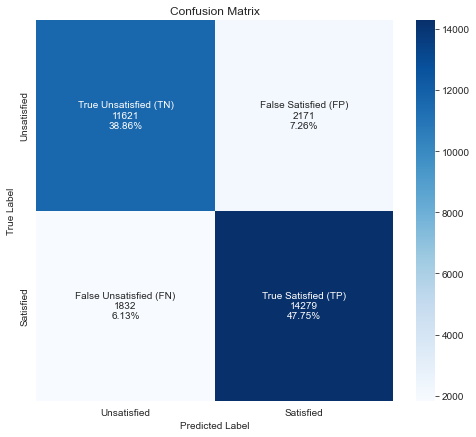

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2) Training score: 0.968
DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2) Test score: 0.932


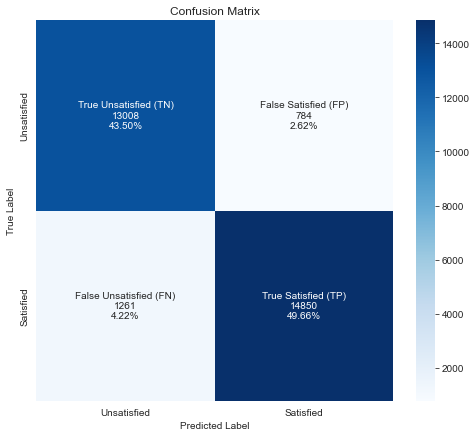

----------------------------------------------------------------------------------------------------
RandomForestClassifier(max_depth=20, n_estimators=300) Training score: 0.996
RandomForestClassifier(max_depth=20, n_estimators=300) Test score: 0.956


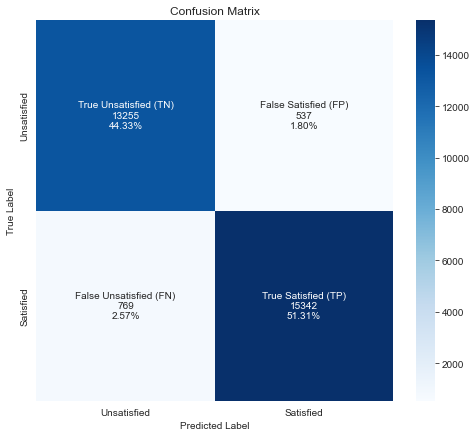

----------------------------------------------------------------------------------------------------


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

models = [model1, model2, model3]  # models list

for model in models:

    model.fit(x_train_scaled, y_train)

    train_score = model.score(x_train_scaled, y_train)
    print(f"{model} Training score: {train_score:.3f}")

    test_score = model.score(x_test_scaled, y_test)
    print(f"{model} Test score: {test_score:.3f}")

    y_pred = model.predict(x_test_scaled)

    # Generating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 7))

    # Calculate percentages
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Create annotation labels for confusion matrix
    # Adjusting labels for 'satisfied' and 'unsatisfied'
    labels_annot = np.array([["True Unsatisfied (TN)", "False Satisfied (FP)"], 
                             ["False Unsatisfied (FN)", "True Satisfied (TP)"]])

    # Combine the labels
    labels_combined = np.char.add(np.char.add(labels_annot, "\n"), labels)

    sns.heatmap(conf_matrix, annot=labels_combined, fmt="", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(ticks=[0.5, 1.5], labels=["Unsatisfied", "Satisfied"])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=["Unsatisfied", "Satisfied"])  # Adjust y-axis labels
    plt.show()

    for _ in range(100):
        print("-", end="")
    print()


# ROC curves

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

 Unsatisfied       0.86      0.84      0.85     13792
   Satisfied       0.87      0.89      0.88     16111

    accuracy                           0.87     29903
   macro avg       0.87      0.86      0.87     29903
weighted avg       0.87      0.87      0.87     29903

The AUC for LogisticRegression is: 0.9413646793251746
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

 Unsatisfied       0.91      0.94      0.92     13792
   Satisfied       0.95      0.92      0.93     16111

    accuracy                           0.93     29903
   macro avg       0.93      0.93      0.93     29903
weighted avg       0.93      0.93      0.93     29903



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The AUC for DecisionTreeClassifier is: 0.9570301400910534
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

 Unsatisfied       0.94      0.96      0.95     13792
   Satisfied       0.97      0.95      0.96     16111

    accuracy                           0.96     29903
   macro avg       0.96      0.96      0.96     29903
weighted avg       0.96      0.96      0.96     29903

The AUC for RandomForestClassifier is: 0.9929727721120053


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


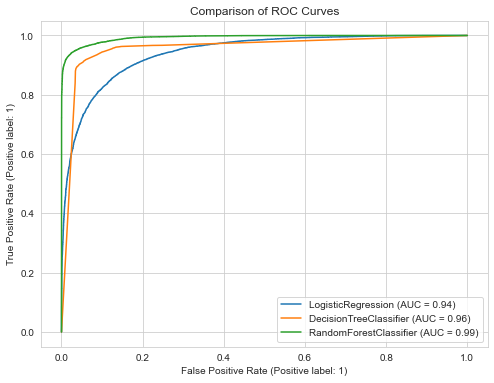

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
import seaborn as sns
# Load the three models
model1 = LogisticRegression(C=0.1, max_iter=300, solver='liblinear')
model2 = DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=2)
model3 = RandomForestClassifier(max_depth=20, n_estimators=300)
final_models = [model1, model2, model3]  # list of models
model_names = [type(model).__name__ for model in final_models]

# Plotting ROC Curves
plt.figure(figsize=(8, 6))

for final_model in final_models:
    final_model.fit(x_train_scaled, y_train)
    y_pred = final_model.predict(x_test_scaled)
    y_pred_proba = final_model.predict_proba(x_test_scaled)[:, 1]  # Probability predictions

    # Print classification report
    print(f"Classification Report for {type(final_model).__name__}:")
    print(classification_report(y_test, y_pred, target_names=['Unsatisfied', 'Satisfied']))
    # Calculate and print the AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"The AUC for {type(final_model).__name__} is: {auc}")
    # Plot ROC Curve
    metrics.plot_roc_curve(final_model, x_test_scaled, y_test, ax=plt.gca())

plt.title('Comparison of ROC Curves')
plt.show()


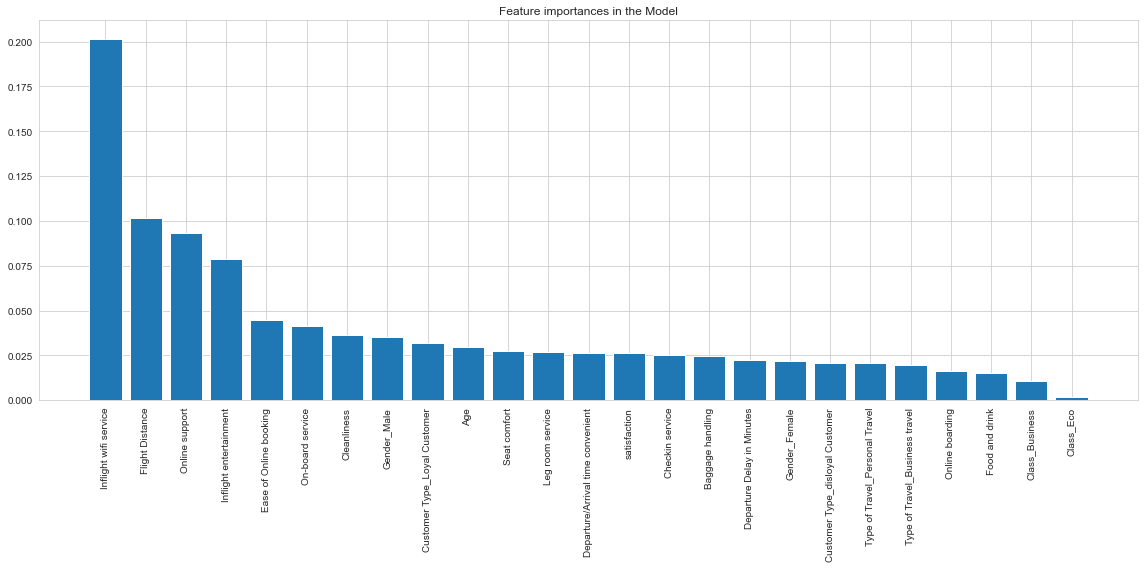

In [51]:
import numpy as np
import matplotlib.pyplot as plt

feature_list = df.columns.tolist()

if hasattr(model3, 'feature_importances_'):
    # Extract feature importances
    importances = model3.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names
    feature_names = [feature_list[i] for i in indices]

    # Create plot
    plt.figure(figsize=(16, 8))
    plt.title("Feature importances in the Model")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names, rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print(f"{type(model3).__name__} does not support feature importances.")
